# MRP : Exploratory Data Analysis

In [34]:
#Importing Libraries 
import numpy as np
import os
from random import shuffle
import re
import urllib.request
import zipfile
import lxml.etree
import wordcloud
import warnings
warnings.filterwarnings("ignore")

### Reading TREC's ROBUST data collection 

In [66]:
from  nltk.tokenize  import word_tokenize

data_folder = os.path.join('C:/NareshPersonal/Python/MRP/rb04', 'rb04')
all_recipe_files = [os.path.join(data_folder, fname)
                    for fname in os.listdir(data_folder)]
documents = {}
for recipe_fname in all_recipe_files:
    bname = os.path.basename(recipe_fname)
    recipe_number = os.path.splitext(bname)[0]
    with open(recipe_fname, 'r') as f:
        documents[recipe_number] = f.read()
        
#Getting entire Corpus        
corpus_all_in_one = ' '.join([doc for doc in documents.values()])

#Printing Number of Docs, total Tokens and total Characters
print("Number of docs: {}".format(len(documents)))

try:  # py3
    all_tokens = [t for t in word_tokenize(corpus_all_in_one)]
except UnicodeDecodeError: 
    all_tokens = [t for t in word_tokenize(corpus_all_in_one.decode('utf-8'))]

print("Total number of tokens: {}".format(len(all_tokens)))

print("Corpus size (char): {}".format(len(corpus_all_in_one)))

Number of docs: 31314
Total number of tokens: 34887440
Corpus size (char): 172603287


### Data Preparation

In [67]:
#Extracting Sentences from the Corpus
from nltk.tokenize import sent_tokenize
sents = sent_tokenize(corpus_all_in_one)
print(sents[0])  # the first sentence in the list is at position 0


Language: <F P=105> Spanish </F>
Article Type:BFN 

  [Text] Rigoberta Menchu, the 1992 Nobel Prize peace 
laureate, stated in Geneva recently, that the [U.S.] military 
presence in Guatemala was detrimental to the people of her 
country.


In [71]:
#Tokenizig Sentences
from nltk.tokenize import TweetTokenizer, sent_tokenize
tokenizer_words = TweetTokenizer()
tokens_sentences = [tokenizer_words.tokenize(t) for t in 
nltk.sent_tokenize(corpus_all_in_one)]
print(tokens_sentences[0:2])

[['Language', ':', '<', 'F', 'P=', '105', '>', 'Spanish', '</F>', 'Article', 'Type', ':', 'BFN', '[', 'Text', ']', 'Rigoberta', 'Menchu', ',', 'the', '1992', 'Nobel', 'Prize', 'peace', 'laureate', ',', 'stated', 'in', 'Geneva', 'recently', ',', 'that', 'the', '[', 'U', '.', 'S', '.', ']', 'military', 'presence', 'in', 'Guatemala', 'was', 'detrimental', 'to', 'the', 'people', 'of', 'her', 'country', '.'], ['She', ',', 'thus', ',', 'asked', 'President', 'Ramiro', 'de', 'Leon', 'Carpio', 'not', 'to', 'maintain', 'U', '.', 'S', '.', 'troops', 'in', 'the', 'country', '.']]


In [72]:
#Preparing Stop Word list
from nltk.corpus import stopwords
import string
#print(stopwords.words('english'))
print(string.punctuation)
#print(len(stopwords.words('english')))
stop_list = stopwords.words('english') + list(string.punctuation)

#Additional charcters to be added in stop list
stop_list.append('``')
stop_list.append('\'s')
stop_list.append('\'\'')
stop_list.append('``')
stop_list.append('--')
print(stop_list)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only

In [73]:
#Preparing Filtered sentences after removing stop words and special charcters 
filtered_sentence = []
for sent in tokens_sentences:
   # print(sent)
   # word_tokens = word_tokenize(sent)
    filtered_word=[]
    for w in sent:
        if w.lower() not in stop_list:
            filtered_word.append(w.lower())
    filtered_sentence.append(filtered_word)

### Exploratory Analysis 

In [74]:
#Finding most common words 
from nltk.stem import PorterStemmer
from  collections  import Counter
stemmer = PorterStemmer()
all_tokens_lower = [t.lower() for t in all_tokens]

tokens_normalised = [stemmer.stem(t) for t in all_tokens_lower
                                     if t not in stop_list]

total_term_frequency_normalised = Counter(tokens_normalised)
w=[]
f=[]
for word, freq in total_term_frequency_normalised.most_common(15):
    w.append(word)
    f.append(freq)
    print("{}\t{}".format(word, freq))

pjg	577400
0012	249715
frnewlin	249711
p	233869
/p	226408
itag	116923
/itag	116923
g=1	112713
said	96804
f=1	81785
year	67478
007	60490
intabl	60454
would	54033
0104	53182


In [76]:
w=[]
f=[]
for word, freq in total_term_frequency_normalised.most_common(25):
    w.append(word)
    f.append(freq)
    print("{}\t{}".format(word, freq))

pjg	577400
0012	249715
frnewlin	249711
p	233869
/p	226408
itag	116923
/itag	116923
g=1	112713
said	96804
f=1	81785
year	67478
007	60490
intabl	60454
would	54033
0104	53182
hyph	50385
state	50119
l=11	49683
one	48533
use	46481
new	41495
also	40779
peopl	35830
govern	35345
develop	35104


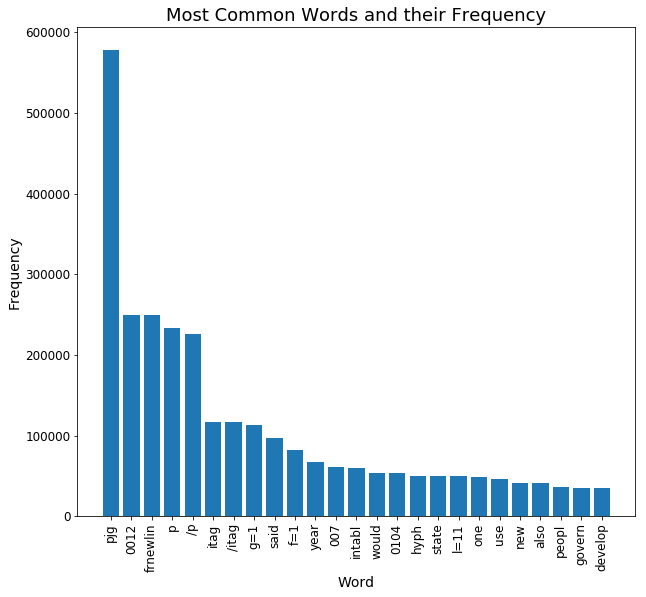

In [77]:
#Plotting Bar graph for top words and their frequency 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,9))
plt.bar(w, f)
plt.xticks( rotation=90)
plt.xlabel("Word",size=14)
plt.ylabel("Frequency",size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Most Common Words and their Frequency", size=18)
plt.show()

In [82]:
corpus_all_in_one[1:100000]

'Language: <F P=105> Spanish </F>\nArticle Type:BFN \n\n  [Text] Rigoberta Menchu, the 1992 Nobel Prize peace \nlaureate, stated in Geneva recently, that the [U.S.] military \npresence in Guatemala was detrimental to the people of her \ncountry. She, thus, asked President Ramiro de Leon Carpio not \nto maintain U.S. troops in the country. \n  Menchu won the coveted prize a year ago. At that time, the \nthen government of President Jorge Serrano Elias concocted a \nplot to stop her from receiving the Nobel Peace Prize, although \nit was the first time a Guatemalan citizen received the peace \nprize. Writer Miguel Angel Asturias won the Nobel Prize in \nliterature a few years ago. \n  Nevertheless, Jorge Serrano\'s government refused to \nrecognize \nMiss Menchu as the most worthy representative of the country and \nmanaged to get the important award to remain in Mexico, where it \nstill remains. \n  Rigoberto Menchu gave President Ramiro de Leon Carpio her \npersonal support but withdre

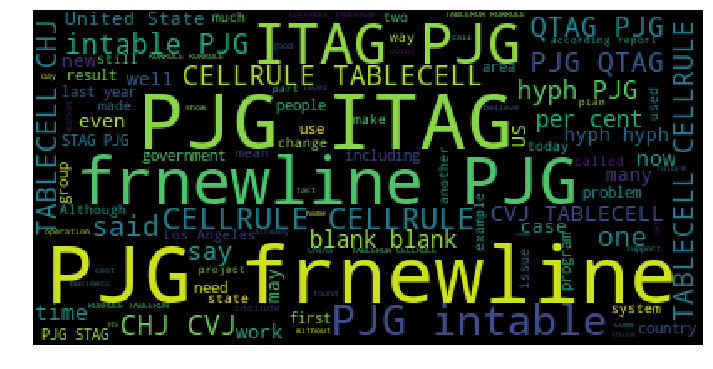

In [86]:
#WordCloud of Data set
from wordcloud import WordCloud
cloud = WordCloud(max_words=100)
cloud.generate_from_text(corpus_all_in_one)
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

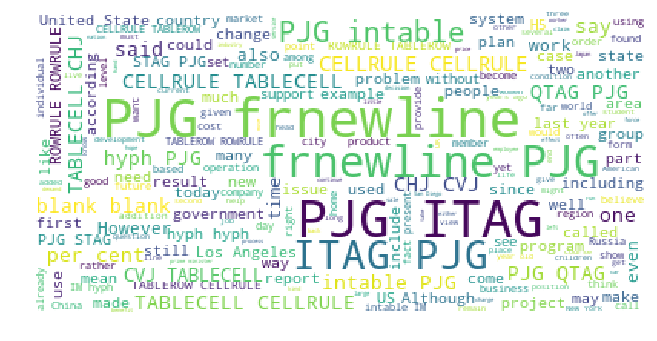

In [110]:
#WordCloud of Data set
from wordcloud import WordCloud
#cloud = WordCloud(max_words=100)
wordcloud = WordCloud(background_color='white',stopwords=stop_list, max_words=200, max_font_size=35)
wordcloud.generate_from_text(corpus_all_in_one)
#plt.figure(15)
#plt.figure(figsize=(12,10))
plt.figure( figsize=(11,8))#, facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
#plt.tight_layout(pad=0)
plt.show()

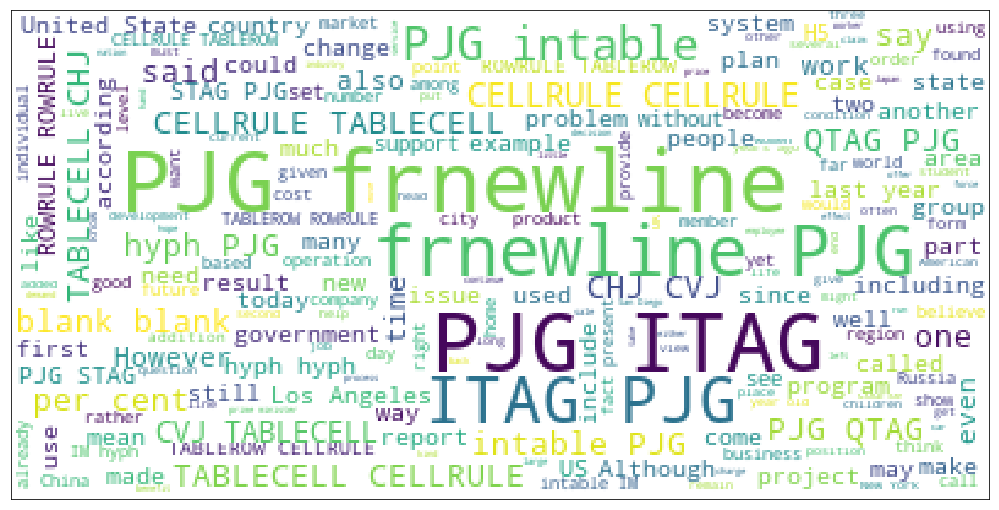

In [138]:
plt.figure( figsize=(20,9))
plt.imshow(wordcloud)
#plt.axis('off')
#plt.tight_layout(pad=0)
plt.xticks([])
plt.yticks([])
plt.show()

### Word Embedding: word2vec model

In [98]:
from gensim.models import word2vec
model = word2vec.Word2Vec(filtered_sentence, size=500, window=20, min_count=1000, workers=4)

In [99]:
#Most Similar words example
model.most_similar('institute')

[('academy', 0.5777850151062012),
 ('center', 0.5776240825653076),
 ('university', 0.5595423579216003),
 ('sciences', 0.5319428443908691),
 ('laboratory', 0.5193803310394287),
 ('assn', 0.5126378536224365),
 ('professor', 0.5106548070907593),
 ('science', 0.5055598020553589),
 ('foundation', 0.4955703020095825),
 ('association', 0.48379048705101013)]

In [101]:
#Most Similar words example
model.most_similar('health')

[('medical', 0.4824829399585724),
 ('welfare', 0.4111167788505554),
 ('illness', 0.39177775382995605),
 ('prevention', 0.3691939115524292),
 ('diseases', 0.36498355865478516),
 ('hospitals', 0.34922951459884644),
 ('aids', 0.34465858340263367),
 ('education', 0.33592158555984497),
 ('agriculture', 0.33056706190109253),
 ('hospital', 0.31387802958488464)]

In [139]:
#Length of word2vec Vocabulary
len(model.wv.vocab)

2766

In [157]:
#Function for word2Vec plot using TNSE with dimensionality reduction 
x = []
y = []
labels = []
tokens = []
from sklearn.manifold import TSNE
def tsne_plot(model,x,y,labels,tokens):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    return(x,y,labels,tokens)

In [158]:
%time x,y,labels,tokens = tsne_plot(model,x,y,labels,tokens)

Wall time: 6min 35s


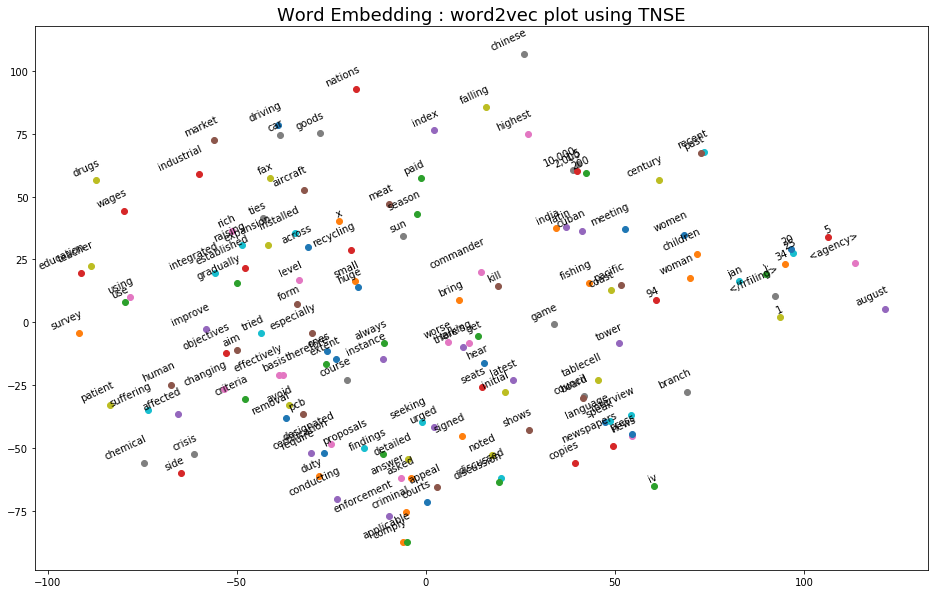

In [182]:
plt.figure(figsize=(16, 10)) 
for i in range(0,len(x),20):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2),textcoords='offset points', ha='right', va='bottom',
                 rotation=25)
    plt.title("Word Embedding : word2vec plot using TNSE", size=18)
plt.show()

In [140]:
#Function for word2Vec plot using TNSE with dimensionality reduction 
from sklearn.manifold import TSNE
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(model)

In [183]:
#Using TF IDF vecotorization to plot word vector
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_list,use_idf=True, ngram_range=(1,2) )
X =vectorizer.fit_transform(sents)

In [ ]:
# for the visualization purpose, identifying k-clusters
# using k-means algorithm. 
from sklearn.metrics.pairwise import cosine_similarity

# value of X was determined using vectorizer.fit_transform function
# in the code above. 
vectorized=X
dist = 1 - cosine_similarity(X)
k = 10 # number of nearest neighbors to consider
d = 2 # dimensionality

In [56]:
import matplotlib as mpl
import numpy
from sklearn import manifold
import scipy
from sklearn.manifold import MDS

# Multidimensional scaling
MDS()
# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

Wall time: 0 ns
Wall time: 0 ns


In [49]:
#pos = manifold.Isomap(k, d, eigen_solver='auto').fit_transform(X.toarray())

In [57]:
# Semantic labeling of cluster. Apply a label if the clusters 
# max TF-IDF is in the 99% quantile of the whole corpus of TF-IDF scores

labels = vectorizer.get_feature_names() #text labels of features
clusterLabels = []
t99 = scipy.stats.mstats.mquantiles(X.data, [ 0.99])[0]
clusterLabels = []
for i in range(0,vectorized.shape[0]):
    row = vectorized.getrow(i)
    if row.max() >= t99:
        arrayIndex = numpy.where(row.data == row.max())[0][0]
        clusterLabels.append(labels[row.indices[arrayIndex]])
    else:
        clusterLabels.append('')

In [62]:
# Finding the clusters for the k-means defined above

from sklearn.cluster import KMeans
num_clusters = 15
km = KMeans(n_clusters=num_clusters)
%time km.fit(X)
clusters = km.labels_.tolist()

Wall time: 2.4 s


In [63]:
# Defining colors for each cluster
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5:'#653700', 6:'#ff028d', 7:'#89fe05', 8:'#f97306', 
                  9:'#380282', 10:'#840000', 11:'#dbb40c', 12:'#960056', 13:'#40a368', 14:'#03719c'}
#cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
cluster_names =clusterLabels

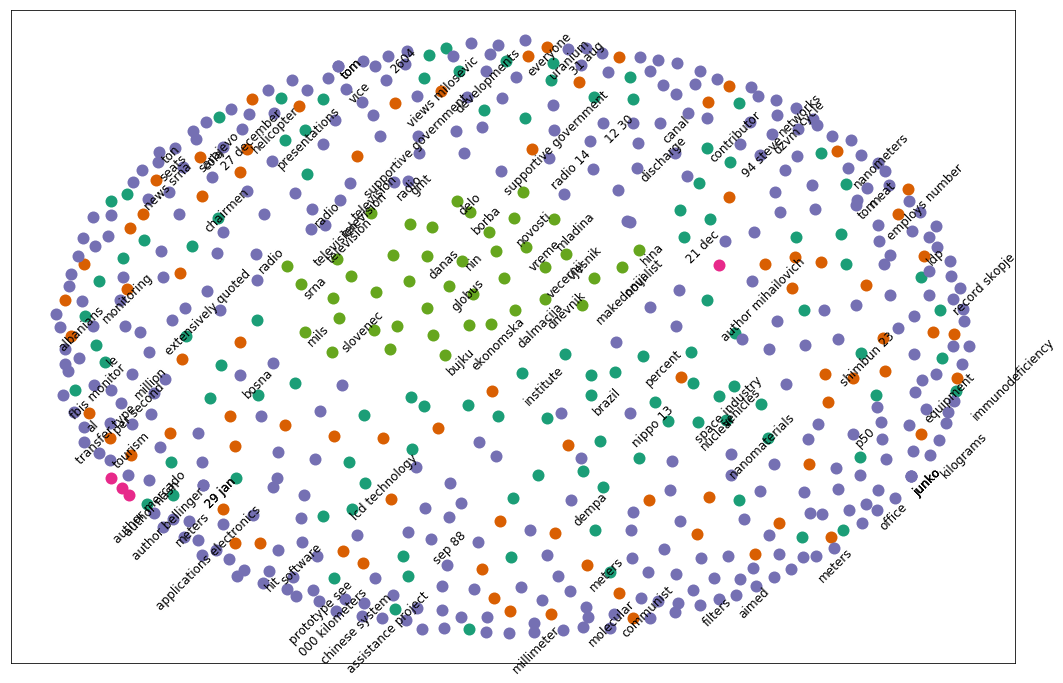

In [64]:
import pandas as pd
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=cluster_names)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(18, 12)) # set size
#fig, ax = plt.subplots(figsize=(15,20)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
#add label in x,y position with the label as the film title
for i in range(0,len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=12, rotation=45)  
    
plt.show() #show the plot

#uncomment the below to save the plot if needed
#plt.savefig('clusters_small_noaxes.png', dpi=200)

### References:
https://github.com/bonzanini/nlp-tutorial/blob/master/notebooks/01%20recipes_exploratory_analysis.ipynb
https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne